# A brief visual of Kenyas Major Media Houses
## A use case of Twitter Profiling
### gyleodhis@outlook.com
### [@gyleodhis](https://www.twitter.com/gyleodhis)
#### Licence:
You can use this code for anything you may wish only leave this page:

__AS IS; HOW IS, WHERE IS__

In [1]:
import pandas as pd
import datetime as datetime
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#combining all tweets into a single dataframe
#allmedia = pd.concat([citizen,dailynation,ktn,ntv,standardmedia,star,tuko], sort=False)
#allmedia.groupby('User').head()

### Reading the tweets and dispalying the top 5 tweets per media house

In [3]:
viewall = pd.read_csv("./allMediahouses.csv")
viewall.groupby('User').head(5)

,User,Created_at,Tweet
0,@citizentvkenya,2019-04-12 16:09:52,Madaktari wa Cuba Mandera: Harera na Rodriguez...
1,@citizentvkenya,2019-04-12 16:08:40,Shambulio la Mandera: Madaktari 2 wa Cuba wate...
2,@citizentvkenya,2019-04-12 16:05:06,Shambulio la Mandera: Afisa wa polisi aliuawa....
3,@citizentvkenya,2019-04-12 16:04:31,DJ Sesy will be on the ones and twos on #OneLo...
4,@citizentvkenya,2019-04-12 15:45:12,Watch a new episode of #TomorrowIsANewDay toni...
200,@dailynation,2019-04-12 16:10:00,"Egypt supports Sudan people, army https://t.c..."
201,@dailynation,2019-04-12 16:00:01,The management of Mumias Sugar Company has den...
202,@dailynation,2019-04-12 15:50:00,ANC dealt another blow in Osotsi ouster bid ht...
203,@dailynation,2019-04-12 15:40:00,MWAURA: Calling back and responding to message...
204,@dailynation,2019-04-12 15:30:00,Rabid dogs bite four in Nyandarua https://t.co...


### Removing Punctuations, Numbers, and Special Characters
...__This is because they usualy have very little meaning in when doing natural language processing__
The results below reveal something interesting:
- Performing an NLP on __Swahili__ words breaks individual words hence most __Swahili tweets__ loose meaning.
- This is not a very good thing.

In [5]:
viewall['Tweet'] = viewall['Tweet'].str.replace("[^a-zA-Z#]", " ")
viewall['Tweet'] = viewall['Tweet'].str.replace("[https://]", " ")
viewall['Tweet'].head(10)

0    Madak ari wa Cuba Mandera  Harera na Rodriguez...
1    S ambulio la Mandera  Madak ari   wa Cuba wa e...
2    S ambulio la Mandera  Afi a wa  oli i aliuawa ...
3    DJ Se y will be on   e one  and  wo  on #OneLo...
4    Wa c  a new e i ode of #TomorrowI ANewDay  oni...
5    Ro e Mu ando  urface     eak  for   e fir    i...
6    YALIYOMO  Kwenye Longa longa  wauliza je m u a...
7    YALIYOMO  Mwanamme amdunga mkewe vi u mara kum...
8    YALIYOMO  Madak ari wawili wa Cuba wa ekwa nya...
9    I aly  France   ar over  ackling e cala ing co...
Name: Tweet, dtype: object

### Our new data frame without punctuation marks and http links

In [6]:
viewall.head(5)

,User,Created_at,Tweet
0,@citizentvkenya,2019-04-12 16:09:52,Madak ari wa Cuba Mandera Harera na Rodriguez...
1,@citizentvkenya,2019-04-12 16:08:40,S ambulio la Mandera Madak ari wa Cuba wa e...
2,@citizentvkenya,2019-04-12 16:05:06,S ambulio la Mandera Afi a wa oli i aliuawa ...
3,@citizentvkenya,2019-04-12 16:04:31,DJ Se y will be on e one and wo on #OneLo...
4,@citizentvkenya,2019-04-12 15:45:12,Wa c a new e i ode of #TomorrowI ANewDay oni...


### Removing short words
...__In NLP words with made up of 3 or less characters also do add very little meaning to the overall context__

In [7]:
viewall['Tweet'] = viewall['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
viewall.head()

,User,Created_at,Tweet
0,@citizentvkenya,2019-04-12 16:09:52,Madak Cuba Mandera Harera Rodriguez walijifunz...
1,@citizentvkenya,2019-04-12 16:08:40,ambulio Mandera Madak Cuba ekwa nyara Maduka m...
2,@citizentvkenya,2019-04-12 16:05:06,ambulio Mandera aliuawa Madak Cuba ekwa nyara ...
3,@citizentvkenya,2019-04-12 16:04:31,will #OneLove urday from CocoJa Seed jNwzjG
4,@citizentvkenya,2019-04-12 15:45:12,#TomorrowI ANewDay onig izen vkenya from IuCvHO


### Text Normalization
#### But first we will have to tokenize the tweets
By this I simply mean that we have to extract each word as a single entity (every word on its own)

In [8]:
tokenized_tweet = viewall['Tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [Madak, Cuba, Mandera, Harera, Rodriguez, wali...
1    [ambulio, Mandera, Madak, Cuba, ekwa, nyara, M...
2    [ambulio, Mandera, aliuawa, Madak, Cuba, ekwa,...
3    [will, #OneLove, urday, from, CocoJa, Seed, jN...
4    [#TomorrowI, ANewDay, onig, izen, vkenya, from...
Name: Tweet, dtype: object

### Now we can now normalize the tokenized tweets.

In [9]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Now let’s stitch these tokens back together.

In [10]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
viewall['Tweet'] = tokenized_tweet

### common words used in the tweets (All media houses combined)

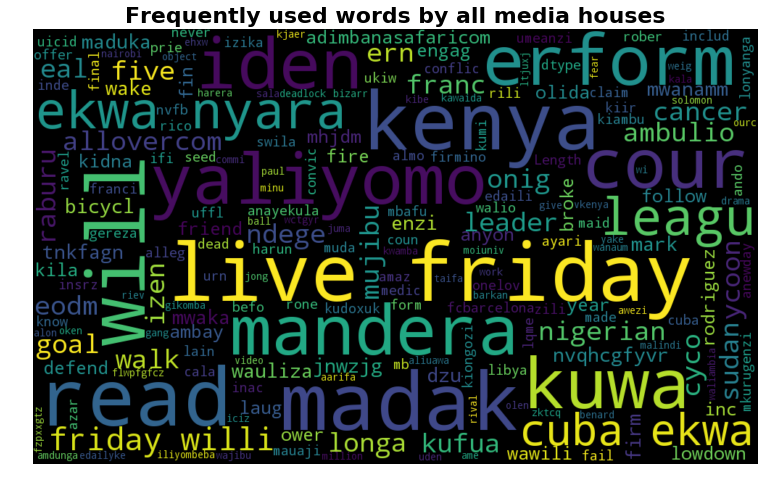

In [67]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_tweet)) 
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Frequently used words by all media houses', fontsize=22, fontweight='bold')
plt.savefig('allmedia.png')
plt.show()

#### The following words feature the most in all the major media houses:
- __Friday__
- __Mandera__
- __Cuba__
- __Yaliyomo__
- __Madaktari__ (though represented as madak)
- __Sudan__ among others.

This can gives the insight of what many Kenyans are most concerned with

### Here we now create a dataframe for each meadia house

In [12]:
citizen = viewall[viewall['User']=='@citizentvkenya']
dailynation = viewall[viewall['User']=='@dailynation']
ktn = viewall[viewall['User']=='@KTNKenya']
ntv = viewall[viewall['User']=='@ntvkenya']
standard = viewall[viewall['User']=='@StandardKenya']
star = viewall[viewall['User']=='@TheStarKenya']
tuko = viewall[viewall['User']=='@Tuko_co_ke']

In [13]:
tokenized_citizen = citizen['Tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_nation = dailynation['Tweet'].apply(lambda x: x.split())
tokenized_ktn = ktn['Tweet'].apply(lambda x: x.split())
tokenized_ntv = ntv['Tweet'].apply(lambda x: x.split())
tokenized_standard = standard['Tweet'].apply(lambda x: x.split())
tokenized_star = star['Tweet'].apply(lambda x: x.split())
tokenized_tuko = tuko['Tweet'].apply(lambda x: x.split())

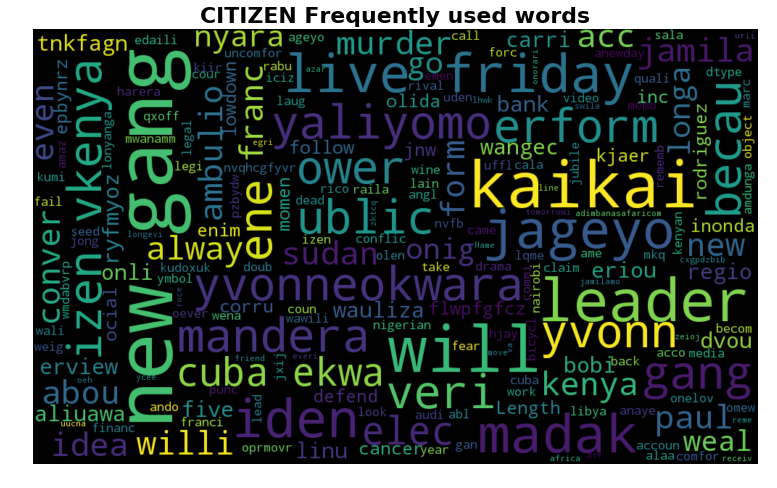

In [14]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_citizen)) 
plt.figure(figsize=(16,8))
plt.title('CITIZEN Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('citizen.png')
plt.show()

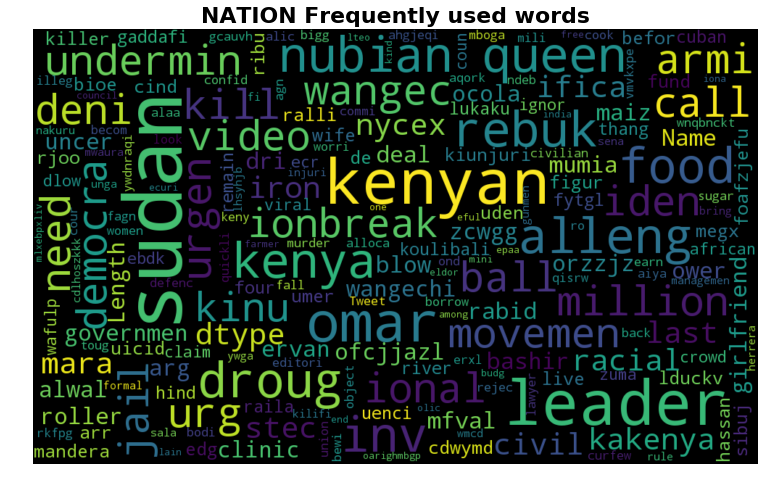

In [15]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_nation)) 
plt.figure(figsize=(16,8))
plt.title('NATION Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('nation.png')
plt.show()

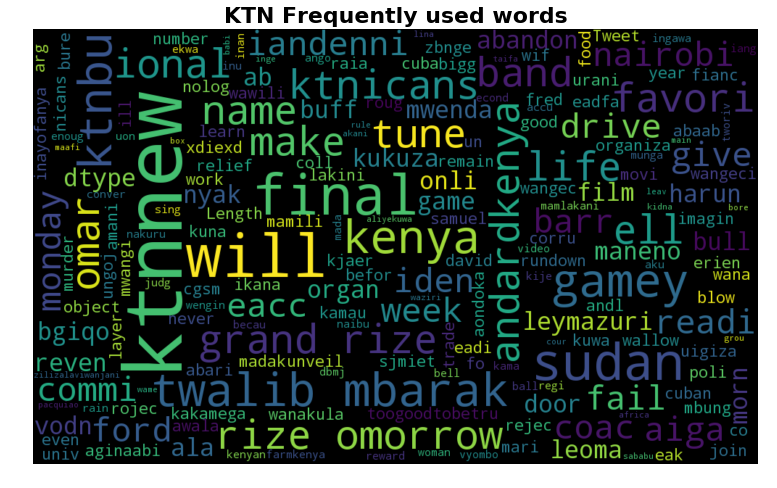

In [16]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_ktn)) 
plt.figure(figsize=(16,8))
plt.title('KTN Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('ktn.png')
plt.show()

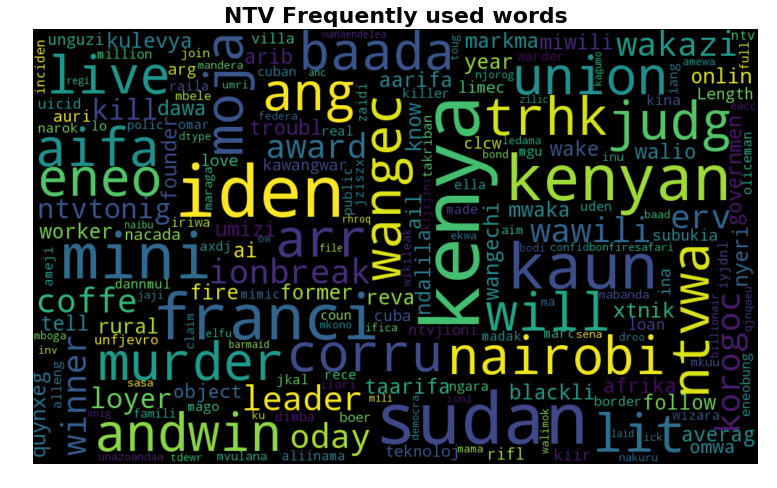

In [17]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_ntv)) 
plt.figure(figsize=(16,8))
plt.title('NTV Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('ntv.png')
plt.show()

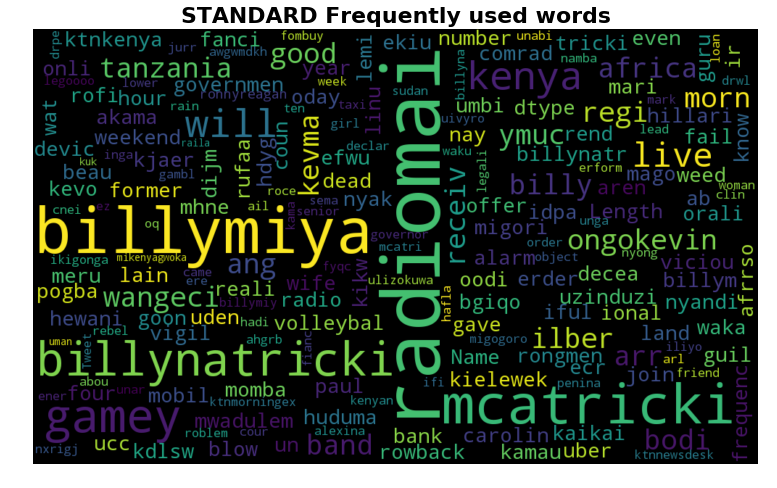

In [18]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_standard)) 
plt.figure(figsize=(16,8))
plt.title('STANDARD Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('standard.png')
plt.show()

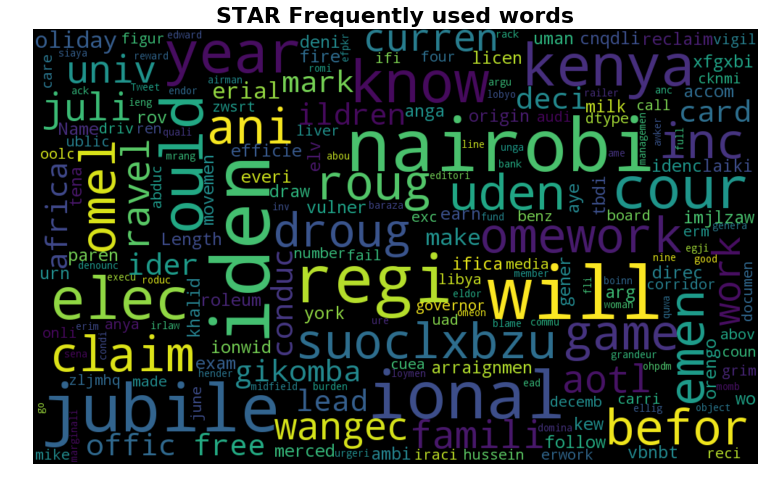

In [19]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_star)) 
plt.figure(figsize=(16,8))
plt.title('STAR Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('star.png')
plt.show()

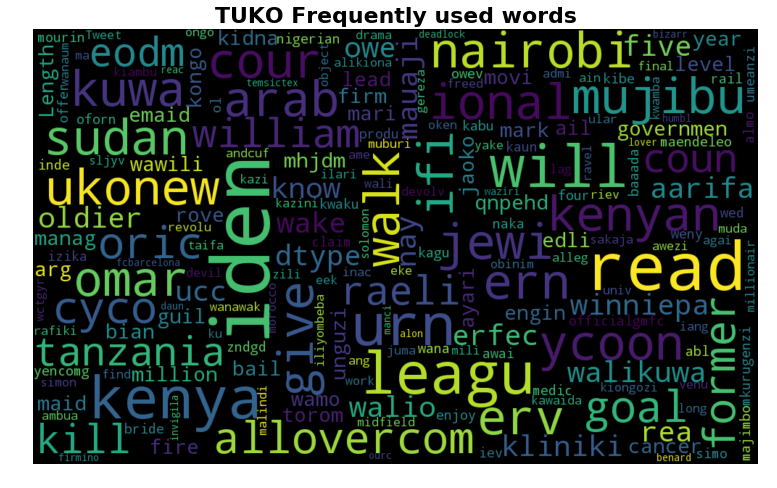

In [20]:
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_tuko)) 
plt.figure(figsize=(16,8))
plt.title('TUKO Frequently used words', fontsize=22, fontweight='bold')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('tuko.png')
plt.show()

In [21]:
citizen.head()

,User,Created_at,Tweet
0,@citizentvkenya,2019-04-12 16:09:52,madak cuba mandera harera rodriguez walijifunz...
1,@citizentvkenya,2019-04-12 16:08:40,ambulio mandera madak cuba ekwa nyara maduka m...
2,@citizentvkenya,2019-04-12 16:05:06,ambulio mandera aliuawa madak cuba ekwa nyara ...
3,@citizentvkenya,2019-04-12 16:04:31,will #onelov urday from cocoja seed jnwzjg
4,@citizentvkenya,2019-04-12 15:45:12,#tomorrowi anewday onig izen vkenya from iucvho


### Data Manipulation based on time
__All media houses__

First we extract the day and hour which the tweets were made and put the in a separate column

In [25]:
viewall['Created_at'] = pd.to_datetime(viewall['Created_at'])
viewall = viewall.set_index("Created_at") # this is the new index of our data frame
viewall['Day'] = viewall.index.weekday_name # adds a new column for day
viewall['Hour'] = viewall.index.hour #adds a new column for hour
viewall.head()

,User,Tweet,Day,Hour
Created_at,,,,
2019-04-12 16:09:52,@citizentvkenya,madak cuba mandera harera rodriguez walijifunz...,Friday,16
2019-04-12 16:08:40,@citizentvkenya,ambulio mandera madak cuba ekwa nyara maduka m...,Friday,16
2019-04-12 16:05:06,@citizentvkenya,ambulio mandera aliuawa madak cuba ekwa nyara ...,Friday,16
2019-04-12 16:04:31,@citizentvkenya,will #onelov urday from cocoja seed jnwzjg,Friday,16
2019-04-12 15:45:12,@citizentvkenya,#tomorrowi anewday onig izen vkenya from iucvho,Friday,15


### We now create two dataframes one for days only and one for the hours which the tweets occurred

In [54]:
days = viewall[['Day','Tweet']]
days_df = days.groupby('Day').count()
hours = viewall[['Hour','Tweet']]
hours_df = hours.groupby('Hour').count()
days_df

,Tweet
Day,
Friday,2988
Thursday,1948
Tuesday,120
Wednesday,544


### Which days do media houses tweet most
The figure below shows that all the media houses are very active on tweeting on __fridays__ while __Tuessdays__ are the least engaged.

Text(0.5, 0, 'Day')

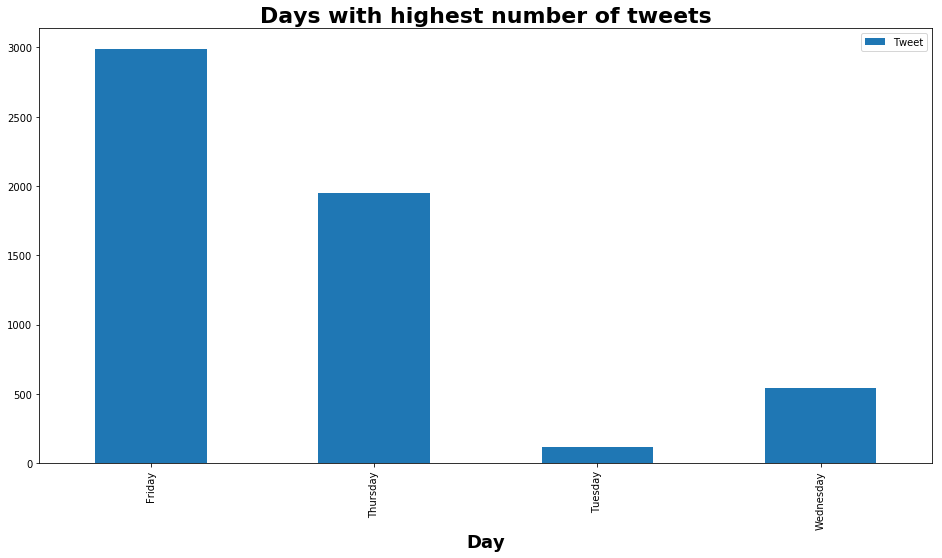

In [59]:
days_df.plot(kind="bar", figsize=(16,8))
plt.title("Days with highest number of tweets", fontsize = 22, fontweight='bold')
plt.xlabel('Day', fontsize =18, fontweight='bold')

### Which hour saw the highest number of tweets
__Note:__ The hours are returned in 24 hours clock system.

Text(0.5, 0, 'Hour')

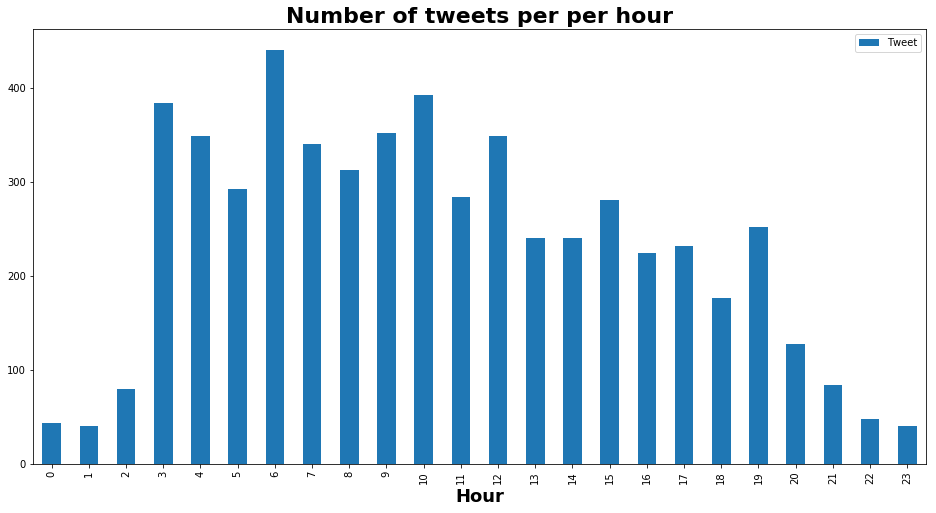

In [66]:
hours_df.plot(kind="bar", figsize=(16,8))
plt.title("Number of tweets per per hour", fontsize = 22, fontweight='bold')
plt.xlabel('Hour', fontsize =18, fontweight='bold')

__Generally the number of tweets keeps increasing per hour from 3a.m in the morning while the times 2200 -0200hrs say the lowest tweets.__

Thats it guys.
Have a nice time and __GOD Bless.__